In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
caged = pd.read_csv('caged_dados.csv')

# Análises Gerais:

In [3]:
caged.head()

,saldo_movimentacao,categoria,grau_instrucao,idade,horas_contratuais,raca_cor,sexo,tipo_movimentacao,tipo_deficiencia,salario_mensal,indicador_aprendiz
0,-1,101,8,27,9.0,6,3,31,0,1850.00,0
1,-1,101,6,22,45.0,3,1,31,0,1320.00,0
2,-1,101,8,37,40.0,1,1,31,0,9164.10,0
3,-1,101,7,37,30.0,1,1,31,0,1989.40,0
4,-1,101,7,32,45.0,6,1,32,0,1885.62,0


In [4]:
caged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9398 entries, 0 to 9397
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   saldo_movimentacao  9398 non-null   int64  
 1   categoria           9398 non-null   int64  
 2   grau_instrucao      9398 non-null   int64  
 3   idade               9398 non-null   int64  
 4   horas_contratuais   9384 non-null   float64
 5   raca_cor            9398 non-null   int64  
 6   sexo                9398 non-null   int64  
 7   tipo_movimentacao   9398 non-null   int64  
 8   tipo_deficiencia    9398 non-null   int64  
 9   salario_mensal      9398 non-null   float64
 10  indicador_aprendiz  9398 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 807.8 KB


In [5]:
caged['salario_mensal'].mean()

2058.447096190679

In [6]:
caged['salario_mensal'].max()

414836.4

In [7]:
caged['salario_mensal'].min()

0.0

In [8]:
caged[caged['salario_mensal'] != 0]['salario_mensal'].sort_values()
#.head()

8456         0.01
8656         5.92
5609         5.92
2065         5.92
4839         5.92
          ...    
8862    302500.00
6422    309249.60
4825    320980.00
3823    321057.00
966     414836.40
Name: salario_mensal, Length: 9282, dtype: float64

In [9]:
maiores_salarios = caged.sort_values(by='salario_mensal', ascending=False)
maiores_salarios.head(3)

,saldo_movimentacao,categoria,grau_instrucao,idade,horas_contratuais,raca_cor,sexo,tipo_movimentacao,tipo_deficiencia,salario_mensal,indicador_aprendiz
966,-1,101,5,52,44.0,3,1,60,0,414836.4,0
3823,-1,101,7,26,44.0,3,1,32,0,321057.0,0
4825,-1,101,7,26,44.0,3,1,40,0,320980.0,0


In [10]:
desligamentos = caged[caged['saldo_movimentacao'] == -1]
desligamentos.head(2)

,saldo_movimentacao,categoria,grau_instrucao,idade,horas_contratuais,raca_cor,sexo,tipo_movimentacao,tipo_deficiencia,salario_mensal,indicador_aprendiz
0,-1,101,8,27,9.0,6,3,31,0,1850.0,0
1,-1,101,6,22,45.0,3,1,31,0,1320.0,0


In [11]:
admissoes = caged[caged['saldo_movimentacao'] == 1]
# admissoes.head()
admissoes['tipo_movimentacao'].unique()

array([97, 35])

In [12]:
maiores_sal_desl = desligamentos.sort_values(by='salario_mensal', ascending=False)
maiores_sal_desl.head(2)

,saldo_movimentacao,categoria,grau_instrucao,idade,horas_contratuais,raca_cor,sexo,tipo_movimentacao,tipo_deficiencia,salario_mensal,indicador_aprendiz
966,-1,101,5,52,44.0,3,1,60,0,414836.4,0
3823,-1,101,7,26,44.0,3,1,32,0,321057.0,0


In [13]:
maiores_sal_adm = admissoes.sort_values(by='salario_mensal', ascending=False)
maiores_sal_adm.head(2)

,saldo_movimentacao,categoria,grau_instrucao,idade,horas_contratuais,raca_cor,sexo,tipo_movimentacao,tipo_deficiencia,salario_mensal,indicador_aprendiz
8862,1,101,7,26,44.0,3,1,97,0,302500.0,0
8216,1,101,7,34,44.0,3,3,97,0,286440.0,0


In [14]:
dicionario = pd.read_csv('caged_dicionario.csv')

#### Mesclando as tabelas para melhorar a visualização:

In [15]:
caged_descrito = pd.read_csv('caged_dados.csv')

for coluna in dicionario['coluna'].unique():
    filtro_coluna = dicionario['coluna'] == coluna
    caged_descrito[coluna] = caged_descrito[coluna].replace(dicionario[filtro_coluna].set_index('chave')['valor'])

caged_descrito.head(2)

,saldo_movimentacao,categoria,grau_instrucao,idade,horas_contratuais,raca_cor,sexo,tipo_movimentacao,tipo_deficiencia,salario_mensal,indicador_aprendiz
0,Desligamento,"Empregado - Geral, Inclusive O Empregado Públi...",Superior Incompleto,27,9.0,Não Informada,Mulher,Desligamento Por Demissão Sem Justa Causa,Não Deficiente,1850.0,0
1,Desligamento,"Empregado - Geral, Inclusive O Empregado Públi...",Médio Incompleto,22,45.0,Parda,Homem,Desligamento Por Demissão Sem Justa Causa,Não Deficiente,1320.0,0


In [16]:
caged_descrito['raca_cor'].value_counts()

raca_cor
Parda               4361
Não Informada       3310
Branca              1295
Preta                366
Amarela               37
Indígena              15
Não Identificado      14
Name: count, dtype: int64

In [17]:
caged_descrito['saldo_movimentacao'].value_counts()

saldo_movimentacao
Admissão        5134
Desligamento    4264
Name: count, dtype: int64

In [18]:
for col in caged_descrito:
    counts = caged_descrito[col].value_counts()
    print(counts)

saldo_movimentacao
Admissão        5134
Desligamento    4264
Name: count, dtype: int64
categoria
Empregado - Geral, Inclusive O Empregado Público Da Administração Direta Ou Indireta Contratado Pela Clt    8970
Empregado - Aprendiz                                                                                         222
Empregado - Contrato De Trabalho Intermitente                                                                105
Empregado - Contrato A Termo Firmado Nos Termos Da Lei 9.601/1998                                             83
Não Identificado                                                                                              14
Trabalhador Temporário - Contrato Nos Termos Da Lei 6.019/1974                                                 4
Name: count, dtype: int64
grau_instrucao
Médio Completo             6380
Superior Completo           861
Médio Incompleto            589
Fundamental Completo        443
Superior Incompleto         335
6ª A 9ª Fundamental     

In [19]:
caged['tipo_movimentacao'].value_counts()

tipo_movimentacao
97    5130
31    2500
40     986
43     539
90     108
32     100
60      23
98       5
35       4
33       3
Name: count, dtype: int64

In [20]:
caged_descrito['tipo_movimentacao'].value_counts(dropna=False)

tipo_movimentacao
97                                                      5130
Desligamento Por Demissão Sem Justa Causa               2500
Desligamento A Pedido                                    986
Término Contrato Trabalho Prazo Determinado              539
Desligamento Por Acordo Entre Empregado E Empregador     108
Desligamento Por Demissão Com Justa Causa                100
Desligamento Por Morte                                    23
Desligamento De Tipo Ignorado                              5
Admissão Por Reintegração                                  4
Culpa Recíproca                                            3
Name: count, dtype: int64

In [21]:
# caged_descrito[coluna] = caged_descrito[coluna].replace(dicionario[filtro_coluna].set_index('chave')['valor'])
caged_descrito['tipo_movimentacao'] = caged_descrito['tipo_movimentacao'].replace(97, 'Admissão não detalhada')
caged_descrito['tipo_movimentacao'].value_counts(dropna=False)

tipo_movimentacao
Admissão não detalhada                                  5130
Desligamento Por Demissão Sem Justa Causa               2500
Desligamento A Pedido                                    986
Término Contrato Trabalho Prazo Determinado              539
Desligamento Por Acordo Entre Empregado E Empregador     108
Desligamento Por Demissão Com Justa Causa                100
Desligamento Por Morte                                    23
Desligamento De Tipo Ignorado                              5
Admissão Por Reintegração                                  4
Culpa Recíproca                                            3
Name: count, dtype: int64

In [22]:
caged_descrito['salario_mensal'].value_counts(dropna=False)

salario_mensal
1302.00    2153
1375.00     964
1320.00     580
1885.62     499
1303.11     185
           ... 
1725.00       1
1715.00       1
704.97        1
1626.00       1
3250.00       1
Name: count, Length: 1533, dtype: int64

## Análises específicas:

In [23]:
desl_desc = caged_descrito[caged_descrito['saldo_movimentacao'] == 'Desligamento']
desl_desc.head(2)

,saldo_movimentacao,categoria,grau_instrucao,idade,horas_contratuais,raca_cor,sexo,tipo_movimentacao,tipo_deficiencia,salario_mensal,indicador_aprendiz
0,Desligamento,"Empregado - Geral, Inclusive O Empregado Públi...",Superior Incompleto,27,9.0,Não Informada,Mulher,Desligamento Por Demissão Sem Justa Causa,Não Deficiente,1850.0,0
1,Desligamento,"Empregado - Geral, Inclusive O Empregado Públi...",Médio Incompleto,22,45.0,Parda,Homem,Desligamento Por Demissão Sem Justa Causa,Não Deficiente,1320.0,0


In [24]:
adm_desc = caged_descrito[caged_descrito['saldo_movimentacao'] == 'Admissão']
adm_desc.head(2)

,saldo_movimentacao,categoria,grau_instrucao,idade,horas_contratuais,raca_cor,sexo,tipo_movimentacao,tipo_deficiencia,salario_mensal,indicador_aprendiz
6,Admissão,Empregado - Contrato A Termo Firmado Nos Termo...,Superior Completo,41,16.0,Parda,Homem,Admissão não detalhada,Não Deficiente,3362.63,0
7,Admissão,"Empregado - Geral, Inclusive O Empregado Públi...",Médio Incompleto,18,44.0,Não Informada,Homem,Admissão não detalhada,Não Deficiente,1320.00,0


#### Análise por raça/cor:

In [25]:
desl_desc['raca_cor'].value_counts()

raca_cor
Parda               2142
Não Informada       1254
Branca               654
Preta                172
Amarela               17
Não Identificado      14
Indígena              11
Name: count, dtype: int64

In [26]:
adm_desc['raca_cor'].value_counts()

raca_cor
Parda            2219
Não Informada    2056
Branca            641
Preta             194
Amarela            20
Indígena            4
Name: count, dtype: int64

In [27]:
grau_i_desl = desl_desc.groupby('grau_instrucao')['raca_cor'].value_counts()
grau_i_desl

grau_instrucao           raca_cor        
5ª Completo Fundamental  Parda                 26
                         Não Informada         13
                         Branca                 8
                         Preta                  2
6ª A 9ª Fundamental      Parda                 96
                         Branca                32
                         Não Informada         21
                         Preta                  7
                         Não Identificado       1
Analfabeto               Não Informada          4
                         Parda                  3
Até 5ª Incompleto        Parda                 59
                         Não Informada         24
                         Preta                  7
                         Branca                 6
Doutorado                Branca                 2
Fundamental Completo     Parda                148
                         Não Informada         40
                         Branca                34
        

In [28]:
grau_i_adm = adm_desc.groupby('grau_instrucao')['raca_cor'].value_counts()
grau_i_adm

grau_instrucao           raca_cor     
5ª Completo Fundamental  Parda              29
                         Não Informada      13
                         Branca              7
                         Preta               2
6ª A 9ª Fundamental      Parda             111
                         Não Informada      29
                         Branca             16
                         Preta               6
Analfabeto               Parda               3
                         Não Informada       3
Até 5ª Incompleto        Parda              95
                         Não Informada      40
                         Branca              8
Doutorado                Parda               2
                         Branca              2
                         Preta               1
Fundamental Completo     Parda             102
                         Não Informada      64
                         Branca             29
                         Preta               6
                     

In [29]:
idade_desl = desl_desc[['idade','raca_cor']]
idade_desl[(idade_desl['idade'] < 40) & (idade_desl['idade'] > 19)].value_counts()

idade  raca_cor        
29     Parda               102
27     Parda                97
26     Parda                95
24     Parda                86
25     Parda                81
                          ... 
34     Não Identificado      1
28     Amarela               1
25     Amarela               1
       Indígena              1
34     Amarela               1
Name: count, Length: 105, dtype: int64

In [30]:
idade_adm = adm_desc[['idade','raca_cor']]
idade_adm[(idade_adm['idade'] < 40) & (idade_adm['idade'] > 19)].value_counts()

idade  raca_cor     
23     Não Informada    105
24     Parda            103
26     Parda             95
24     Não Informada     94
23     Parda             92
                       ... 
35     Indígena           1
24     Amarela            1
       Indígena           1
36     Amarela            1
33     Amarela            1
Name: count, Length: 96, dtype: int64

In [31]:
horas_desl = desl_desc[['horas_contratuais', 'raca_cor']]
horas_desl.value_counts().head(2)

horas_contratuais  raca_cor     
44.0               Parda            1570
                   Não Informada    1015
Name: count, dtype: int64

In [32]:
pivot_table = horas_desl.pivot_table(index='raca_cor', columns= 'horas_contratuais', aggfunc='size', fill_value=0)
porcentagens = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100
porcentagens[porcentagens.columns[(porcentagens.columns > 35) & (porcentagens.columns < 45)]]

horas_contratuais,35.52,35.90,36.00,36.75,37.50,38.00,38.50,38.75,39.00,39.50,...,43.00,43.14,43.30,43.33,43.50,43.75,44.00,44.17,44.30,44.86
raca_cor,,,,,,,,,,,,,,,,,,,,,
Amarela,0.000000,0.000000,5.882353,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,76.470588,0.000000,0.000000,0.000000
Branca,0.000000,0.000000,6.422018,0.000000,0.152905,0.000000,0.152905,0.152905,0.152905,0.000000,...,0.152905,0.152905,0.000000,0.000000,0.000000,0.305810,49.235474,0.152905,0.000000,0.000000
Indígena,0.000000,0.000000,9.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.909091,0.000000,0.000000,0.000000
Não Informada,0.079745,0.000000,4.864434,0.000000,0.000000,0.079745,0.318979,0.000000,0.000000,0.000000,...,0.079745,0.000000,0.000000,0.079745,0.000000,0.079745,80.940989,0.000000,0.000000,0.000000
Parda,0.000000,0.046685,4.528478,0.046685,0.000000,0.140056,0.373483,0.000000,0.000000,0.046685,...,0.093371,0.000000,0.046685,0.000000,0.046685,0.093371,73.295985,0.046685,0.046685,0.046685
Preta,0.000000,0.000000,6.395349,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.581395,69.186047,0.000000,0.000000,0.000000


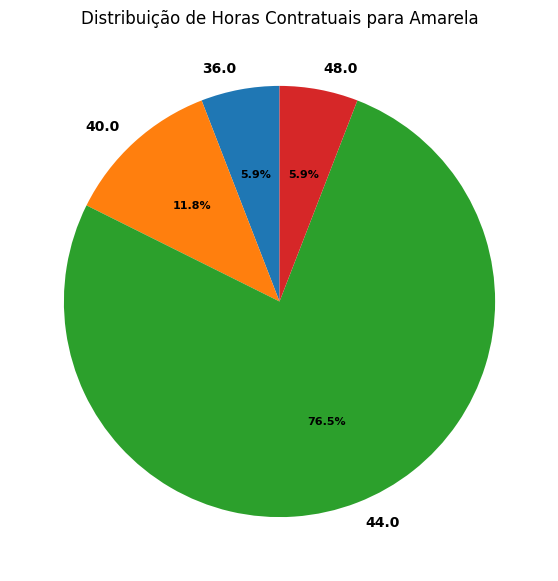

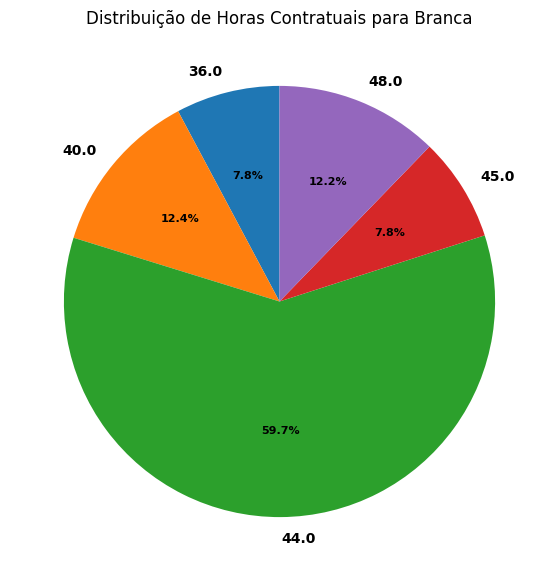

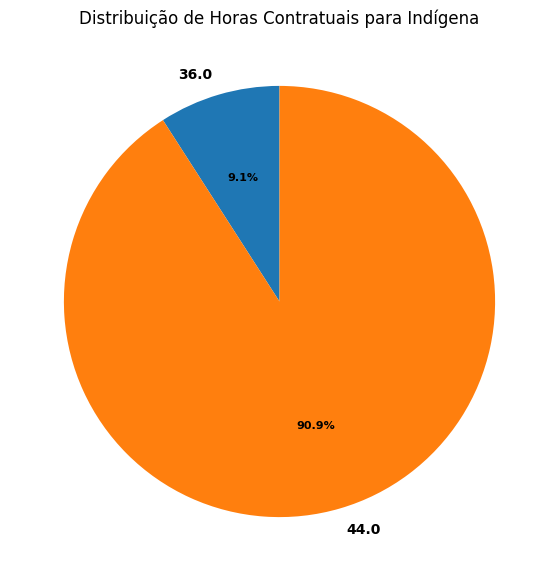

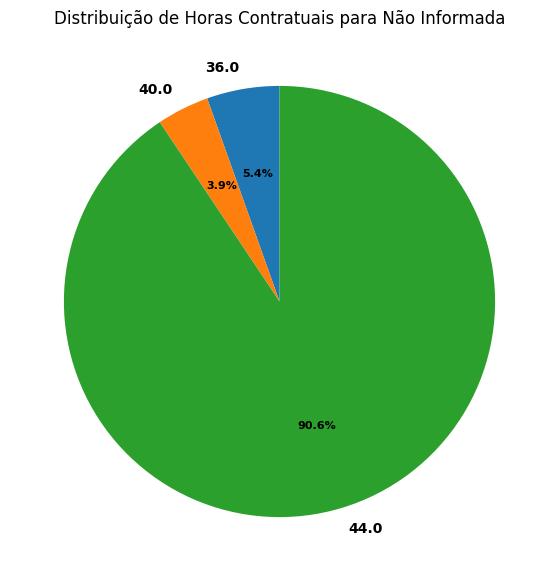

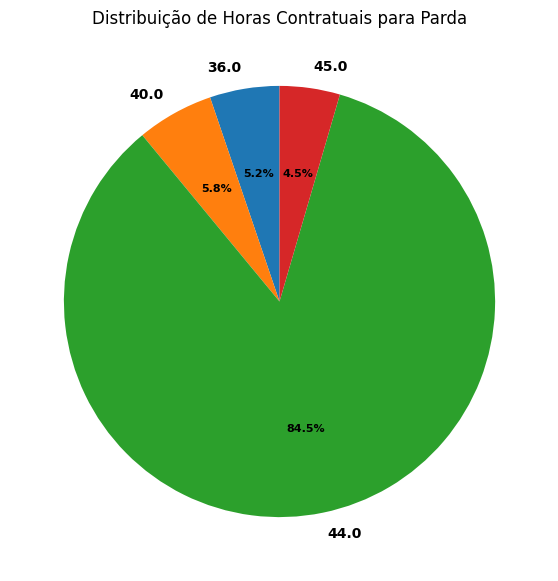

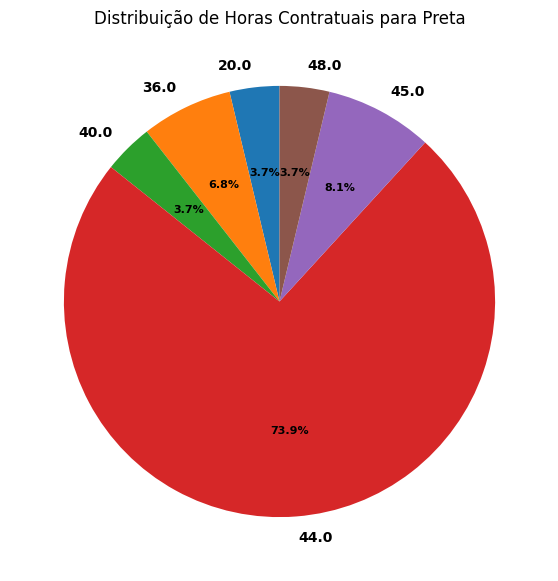

In [33]:
limite_minimo = 3

# iterando sobre as racas
for raca_cor in porcentagens.index:
    # cria uma figura e eixos para cada raca (por isso o loop) e com tamanho determinado
    fig, ax = plt.subplots(figsize=(7, 7))
    
    # filtra as porcentagens abaixo do limite minimo
    porcentagens_filtradas = porcentagens.loc[raca_cor][porcentagens.loc[raca_cor] >= limite_minimo]

    # cria um gráfico de pizza para a raca_cor atual usando as porcentagens filtradas
    wedges, texts, autotexts = ax.pie(porcentagens_filtradas, labels=porcentagens_filtradas.index, autopct='%1.1f%%', startangle=90)

    # ajusta a posicao dos rotulos e porcentagens
    for text, autotext in zip(texts, autotexts):
        text.set(size=10, weight='bold')
        autotext.set(size=8, weight='bold')

    # adiciona titulo para cada pizza usando a raca_cor atual
    ax.set_title(f'Distribuição de Horas Contratuais para {raca_cor}')

    # salva cada pizza com seu devido titulo em arquivo pdf
    #plt.savefig(f'grafico_{raca_cor.lower()}.pdf')

In [34]:
horas_adm = adm_desc[['horas_contratuais', 'raca_cor']]
horas_adm.value_counts().head(2)

horas_contratuais  raca_cor     
44.0               Não Informada    1650
                   Parda            1494
Name: count, dtype: int64

In [35]:
pivot_hadm = horas_adm.pivot_table(index='raca_cor', columns= 'horas_contratuais', aggfunc='size', fill_value=0)
porc_adm = pivot_hadm.div(pivot_hadm.sum(axis=1), axis=0) * 100
porc_adm[porc_adm.columns[(porc_adm.columns > 35) & (porc_adm.columns < 45)]]

horas_contratuais,36.00,36.67,36.75,37.50,37.71,38.50,39.00,39.75,40.00,40.83,...,42.78,42.86,43.00,43.14,43.71,43.75,43.85,44.00,44.14,44.86
raca_cor,,,,,,,,,,,,,,,,,,,,,
Amarela,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75.000000,0.000000,0.000000
Branca,6.084243,0.000000,0.000000,0.000000,0.000000,0.468019,0.156006,0.000000,11.232449,0.156006,...,0.000000,0.000000,0.156006,0.156006,0.000000,0.780031,0.156006,51.170047,0.000000,0.156006
Indígena,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,0.000000,25.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000
Não Informada,3.891051,0.097276,0.000000,0.000000,0.000000,1.313230,0.048638,0.000000,2.821012,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.048638,0.000000,0.000000,80.252918,0.048638,0.000000
Parda,2.388463,0.000000,0.045065,0.135196,0.045065,0.946372,0.045065,0.045065,8.877873,0.000000,...,0.090131,0.045065,0.135196,0.000000,0.000000,0.090131,0.000000,67.327625,0.000000,0.180261
Preta,1.030928,0.000000,0.000000,0.000000,0.000000,1.546392,0.000000,0.000000,6.701031,0.515464,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.618557,0.000000,0.000000


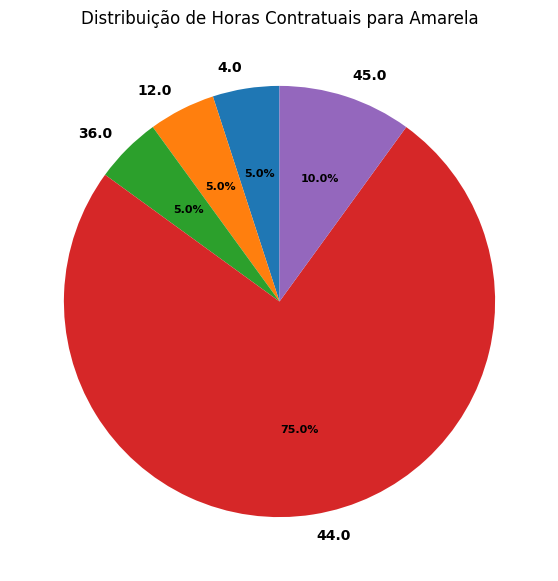

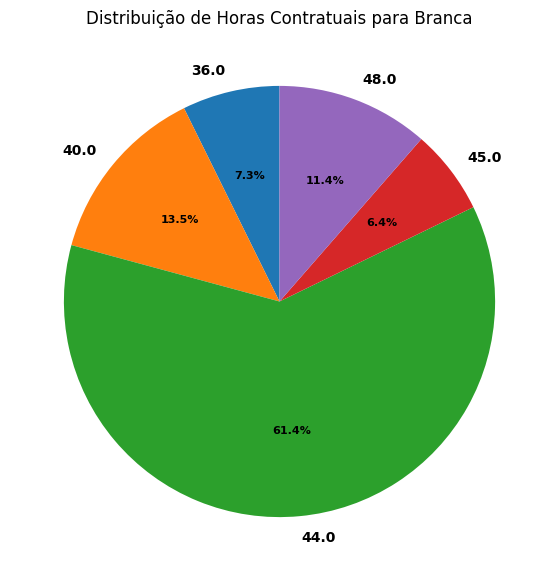

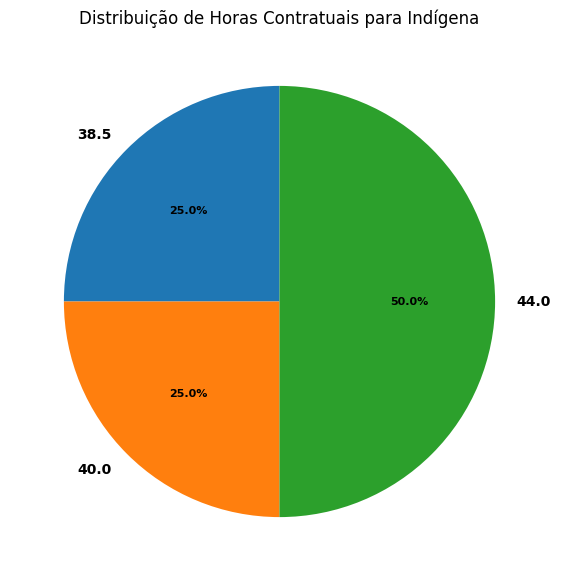

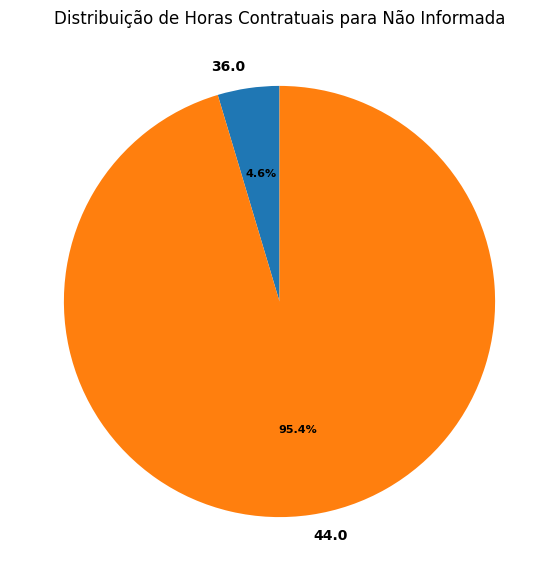

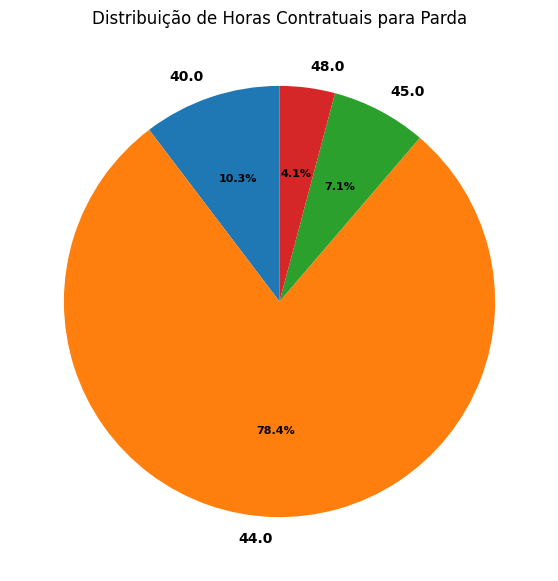

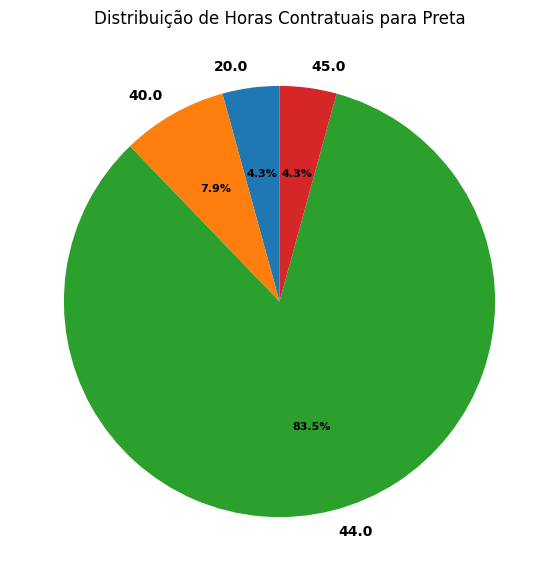

In [36]:
#limite_minimo = 3

# iterando sobre as racas
for raca_cor in porc_adm.index:
    # cria uma figura e eixos para cada raca (por isso o loop) e com tamanho determinado
    fig, ax = plt.subplots(figsize=(7, 7))
    
    # filtra as porcentagens abaixo do limite minimo
    porcentagens_filtradas_adm = porc_adm.loc[raca_cor][porc_adm.loc[raca_cor] >= limite_minimo]

    # cria um gráfico de pizza para a raca_cor atual usando as porcentagens filtradas
    wedges, texts, autotexts = ax.pie(porcentagens_filtradas_adm, labels=porcentagens_filtradas_adm.index, autopct='%1.1f%%', startangle=90)

    # ajusta a posicao dos rotulos e porcentagens
    for text, autotext in zip(texts, autotexts):
        text.set(size=10, weight='bold')
        autotext.set(size=8, weight='bold')

    # adiciona titulo para cada pizza usando a raca_cor atual
    ax.set_title(f'Distribuição de Horas Contratuais para {raca_cor}')

    # salva cada pizza com seu devido titulo em arquivo pdf
    #plt.savefig(f'grafico_adm_{raca_cor.lower()}.pdf')

#### Sexo

In [38]:
caged_descrito.head(2)

,saldo_movimentacao,categoria,grau_instrucao,idade,horas_contratuais,raca_cor,sexo,tipo_movimentacao,tipo_deficiencia,salario_mensal,indicador_aprendiz
0,Desligamento,"Empregado - Geral, Inclusive O Empregado Públi...",Superior Incompleto,27,9.0,Não Informada,Mulher,Desligamento Por Demissão Sem Justa Causa,Não Deficiente,1850.0,0
1,Desligamento,"Empregado - Geral, Inclusive O Empregado Públi...",Médio Incompleto,22,45.0,Parda,Homem,Desligamento Por Demissão Sem Justa Causa,Não Deficiente,1320.0,0


In [40]:
sexo_desl = desl_desc[['raca_cor', 'sexo']]
sexo_desl.head(3)

,raca_cor,sexo
0,Não Informada,Mulher
1,Parda,Homem
2,Branca,Homem


In [41]:
sexo_desl.value_counts()

raca_cor          sexo  
Parda             Homem     1341
Não Informada     Homem      824
Parda             Mulher     801
Não Informada     Mulher     430
Branca            Homem      364
                  Mulher     290
Preta             Homem      107
                  Mulher      65
Amarela           Homem       11
Não Identificado  Homem        9
Amarela           Mulher       6
Indígena          Mulher       6
                  Homem        5
Não Identificado  Mulher       5
Name: count, dtype: int64

In [42]:
sexo_desl_total = desl_desc[['saldo_movimentacao', 'sexo']]
sexo_desl_total.value_counts()

saldo_movimentacao  sexo  
Desligamento        Homem     2661
                    Mulher    1603
Name: count, dtype: int64

In [43]:
sexo_adm_total = adm_desc[['saldo_movimentacao', 'sexo']]
sexo_adm_total.value_counts()

saldo_movimentacao  sexo  
Admissão            Homem     3155
                    Mulher    1979
Name: count, dtype: int64